# Team A - ML 

### Step 1: Data Collection 

**Obtain Data from investing.com from Jan 2021 to July 2021**

For
- Bitcoin (BTC)
- Dogecoin (DOGE)
- Ethereum (ETH)
- Tether (USDT)

In [2]:
import investpy

data = investpy.get_crypto_historical_data(crypto='bitcoin',
                                           from_date='01/01/2021',
                                           to_date='31/07/2021')

data1 = investpy.get_crypto_historical_data(crypto='dogecoin',
                                           from_date='01/01/2021',
                                           to_date='31/07/2021')

data2 = investpy.get_crypto_historical_data(crypto='ethereum',
                                           from_date='01/01/2021',
                                           to_date='31/07/2021')

data3 = investpy.get_crypto_historical_data(crypto='tether',
                                           from_date='01/01/2021',
                                           to_date='31/07/2021')

###  Step 2: Exploratory Data Analysis

***Find Null/Missing Values***
- Observed that none of the datframe have missing values

In [4]:
data.isnull().sum()  

Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

#### Obtain Exact Closing Prices

In [6]:
import pandas as pd
df = pd.DataFrame({'BTC': data.Close,
                   'DOG': data1.Close,
                   'ETH': data2.Close,
                   'USDT': data3.Close})
df.head()

,BTC,DOG,ETH,USDT
Date,,,,
2021-01-01,29359.9,0.005661,729.12,1.0018
2021-01-02,32193.3,0.010489,774.50,1.0003
2021-01-03,32958.9,0.009850,974.97,1.0000
2021-01-04,32022.6,0.009780,1042.40,1.0000
2021-01-05,33991.5,0.009958,1099.52,1.0019


### Visualize Relative Changes of Closing Prices

**Observation**
Whenever the Market for BTC and DOGE rises, USDT will decrease and vice versa

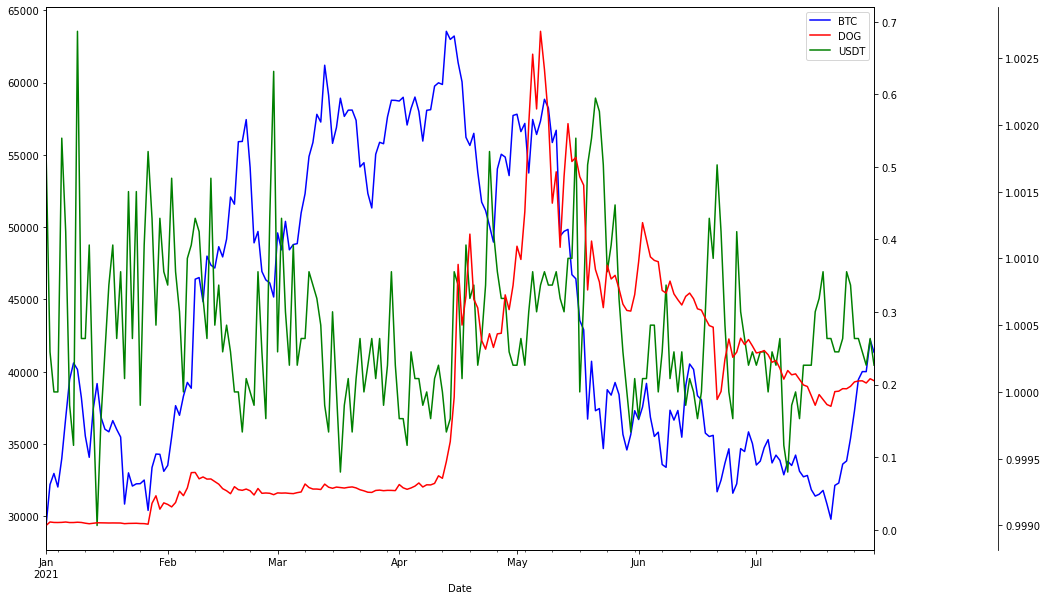

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

#df['BTC'].plot(ax=ax1, style='b-')
#df['DOG'].plot(ax=ax2, style='g-')
df['BTC'].plot(ax=ax1, style='b-')
df['DOG'].plot(ax=ax1, style='r-', secondary_y=True)
df['USDT'].plot(ax=ax2, style='g-')

# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC','DOG','USDT'])

### [Important]

## Measure Correlation of Closing Prices

Pearson Correaltion is calculated on the Closign Prices of BTC, ETH, DOGE and USDT.

**Definition** - Pearson correlation is a measure of the linear correlation between two variables X and Y. 
It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

**Observations**
- Corelation matrix is symetric so only the lower half is shown. 
- DOGE and ETH were highly correlated in past 7 months. This means, when DOGE closing price increased ETH also followed the same. 
- DOGE and ETH were highly correlated with 0.9065 Pearson correlation coefficient.
- BTC, DOGE and ETH usually have low correlation on the market and is shows the same in the visualization
- Everytime, it is said that when the Market for BTC, DOGE, ETH rises, USDT will decrease. Hence the correlation cannot be mapped due to this inverse market trend

<AxesSubplot:>

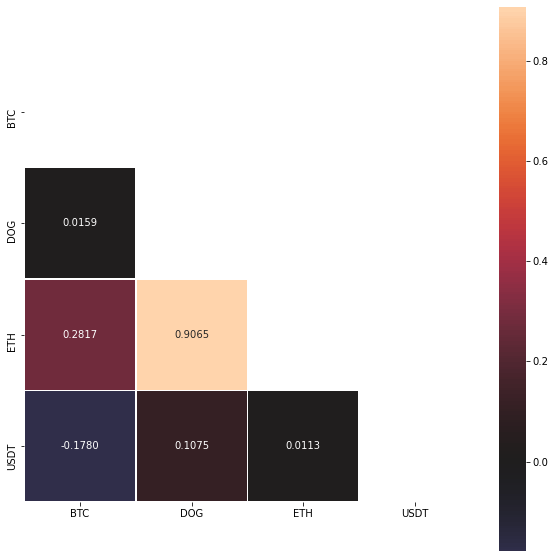

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

### Visualize Returns from 7 months

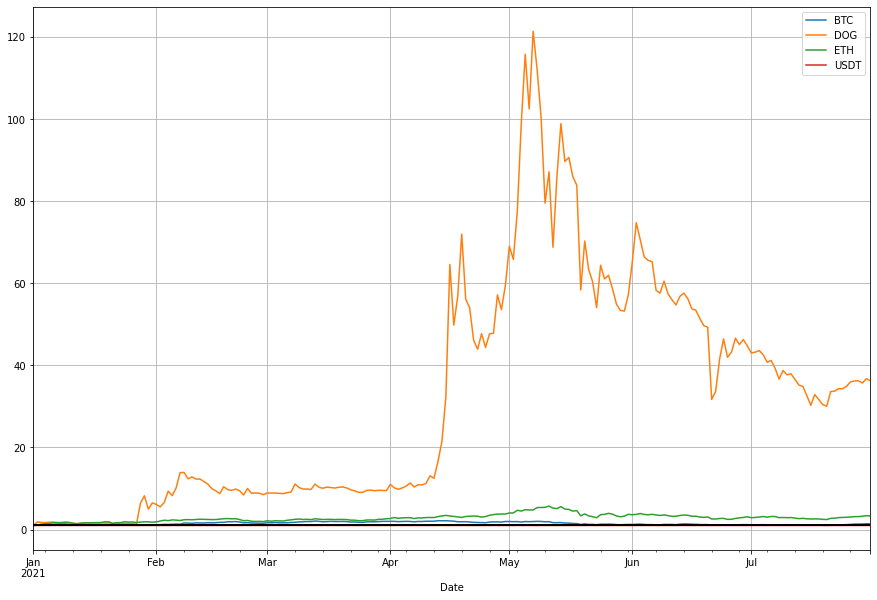

In [11]:
df_return = df.apply(lambda x: x / x[0])
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)

### Percentage Increase in 7 months

,BTC,DOG,ETH,USDT
Date,,,,
2021-07-31,143.186455,3684.737679,337.397136,99.860252


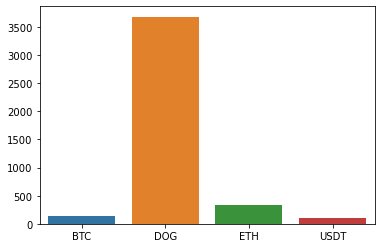

In [12]:
df_perc = df_return.tail(1) * 100
ax = sns.barplot(data=df_perc)
df_perc

### How many coins could have been bought for $2000? 

,BTC,DOG,ETH,USDT
Date,,,,
2021-01-01,0.06812,353294.470942,2.743033,1996.406468


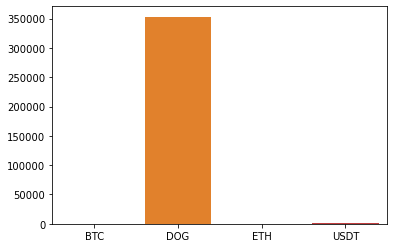

In [13]:
budget = 2000 # USD
df_coins = budget/df.head(1)

ax = sns.barplot(data=df_coins)
df_coins

### How much money could have been made? 

,BTC,DOG,ETH,USDT
Date,,,,
2021-07-31,2815.609045,72499.205087,6672.81106,1996.80575


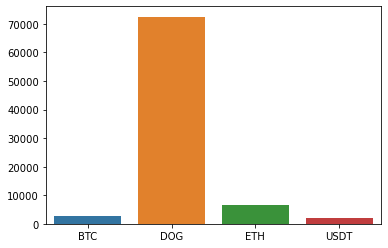

In [14]:
df_profit = df_return.tail(1) * budget

ax = sns.barplot(data=df_profit)
df_profit

# Step 3: Prediction with LSTM

***Normalize Data with MinMaxScalar***

Definition 
- Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set
-  MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.

***Use Pre-Trained LSTM model for Prediction***

### -> Bitcoin prediction for 60 days using LSTM

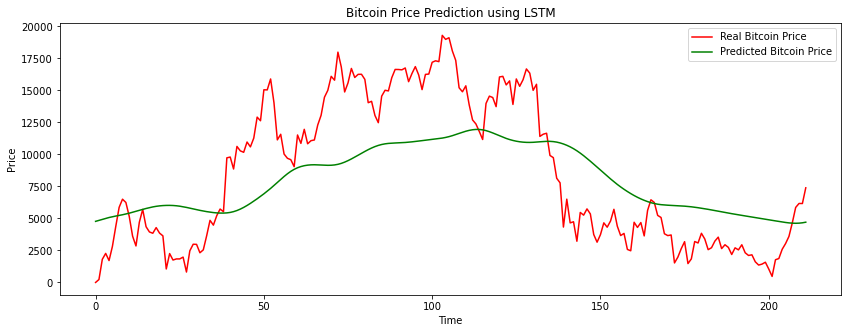

In [25]:
import numpy as np
import investpy
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

training_data = data.drop(['Currency'], axis = 1)

#MinMaxScaler is used to normalize the data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
     X_train.append(training_data[i-60:i])
     Y_train.append(training_data[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

trained_model = tf.keras.models.load_model('team_A_model')

part_60_days = data.tail(60)
df= part_60_days.append(data, ignore_index = True)
df = df.drop(['Currency'], axis = 1)
inputs = scaler.transform(df) 

X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])
    
X_test, Y_test = np.array(X_test), np.array(Y_test) 
Y_pred = trained_model.predict(X_test)
scale = 1/5.18164146e-05
Y_test = Y_test*scale 
Y_pred = Y_pred*scale
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using LSTM')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

### -> Dogecoin Prediction for 60 days using LSTM

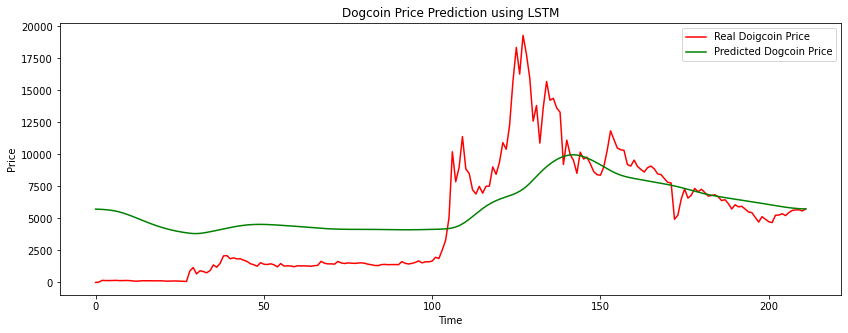

In [23]:
import numpy as np
import investpy
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

training_data = data1.drop(['Currency'], axis = 1)

#MinMaxScaler is used to normalize the data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
     X_train.append(training_data[i-60:i])
     Y_train.append(training_data[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

trained_model = tf.keras.models.load_model('team_A_model')

part_60_days = data1.tail(60)
df= part_60_days.append(data1, ignore_index = True)
df = df.drop(['Currency'], axis = 1)
inputs = scaler.transform(df) 


X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])
    
X_test, Y_test = np.array(X_test), np.array(Y_test) 
Y_pred = trained_model.predict(X_test)
scale = 1/5.18164146e-05
Y_test = Y_test*scale 
Y_pred = Y_pred*scale
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Doigcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Dogcoin Price')
plt.title('Dogcoin Price Prediction using LSTM')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

### -> Ethereum Prediction for 60 days using LSTM

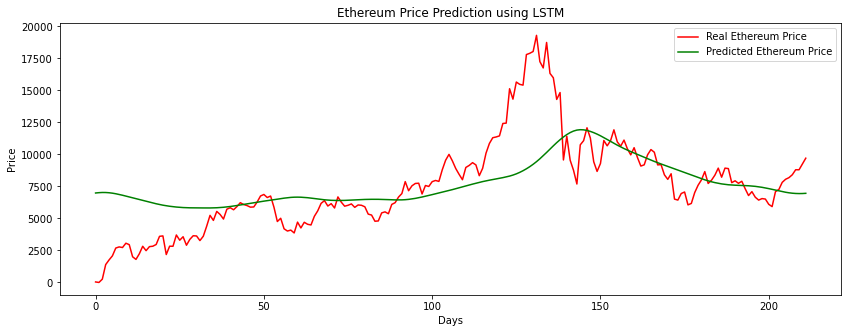

In [28]:
import numpy as np
import investpy
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

data2 = investpy.get_crypto_historical_data(crypto='ethereum',
                                           from_date='01/01/2021',
                                           to_date='31/07/2021')

training_data = data2.drop(['Currency'], axis = 1)

#MinMaxScaler is used to normalize the data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
     X_train.append(training_data[i-60:i])
     Y_train.append(training_data[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

trained_model = tf.keras.models.load_model('team_A_model')

part_60_days = data2.tail(60)
df= part_60_days.append(data2, ignore_index = True)
df = df.drop(['Currency'], axis = 1)
inputs = scaler.transform(df) 

X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])
    
X_test, Y_test = np.array(X_test), np.array(Y_test) 
Y_pred = trained_model.predict(X_test)
    
scale = 1/5.18164146e-05
Y_test = Y_test*scale 
Y_pred = Y_pred*scale

plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Ethereum Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Ethereum Price')
plt.title('Ethereum Price Prediction using LSTM')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

### -> Tether USDT Prediction for 60 days using LSTM 

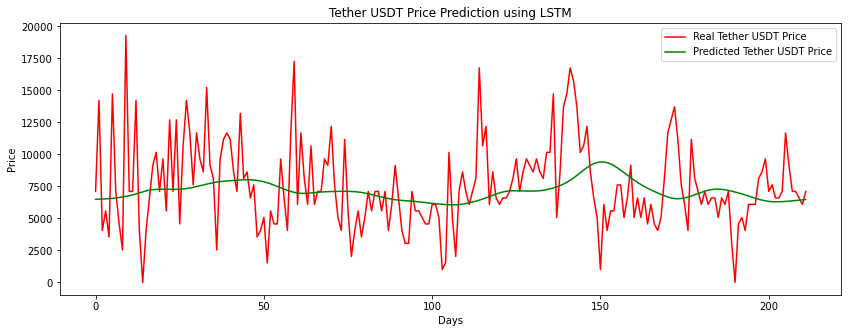

In [29]:
import numpy as np
import investpy
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

data3 = investpy.get_crypto_historical_data(crypto='tether',
                                           from_date='01/01/2021',
                                           to_date='31/07/2021')

training_data = data3.drop(['Currency'], axis = 1)

#MinMaxScaler is used to normalize the data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)

X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
     X_train.append(training_data[i-60:i])
     Y_train.append(training_data[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

trained_model = tf.keras.models.load_model('team_A_model')

part_60_days = data3.tail(60)
df= part_60_days.append(data3, ignore_index = True)
df = df.drop(['Currency'], axis = 1)
inputs = scaler.transform(df) 

X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])
    
X_test, Y_test = np.array(X_test), np.array(Y_test) 
Y_pred = trained_model.predict(X_test)
    
scale = 1/5.18164146e-05
Y_test = Y_test*scale 
Y_pred = Y_pred*scale

plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Tether USDT Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Tether USDT Price')
plt.title('Tether USDT Price Prediction using LSTM')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()